In [14]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')

In [15]:
df = pd.read_csv('datasets/train_V2_cleaned_damage_amount.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   income_am                   1277 non-null   float64
 1   profit_last_am              1277 non-null   float64
 2   profit_am                   1277 non-null   float64
 3   damage_am                   1277 non-null   float64
 4   damage_inc                  1277 non-null   float64
 5   crd_lim_rec                 1277 non-null   float64
 6   cab_requests                1277 non-null   float64
 7   bar_no                      1277 non-null   float64
 8   neighbor_income             1277 non-null   float64
 9   age                         1277 non-null   float64
 10  client_segment              1277 non-null   float64
 11  sect_empl                   1277 non-null   float64
 12  fam_adult_size              1277 non-null   float64
 13  children_no                 1277 

##PCA:

In [45]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=67, svd_solver='full')
pca_model.fit(df)

PCA(copy=True, iterated_power='auto', n_components=67, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

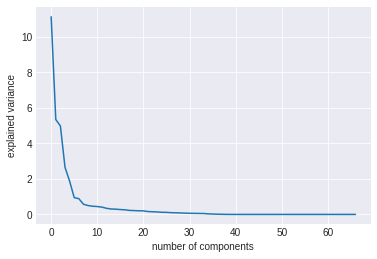

In [46]:
import matplotlib.pyplot as plt
plt.plot(pca_model.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

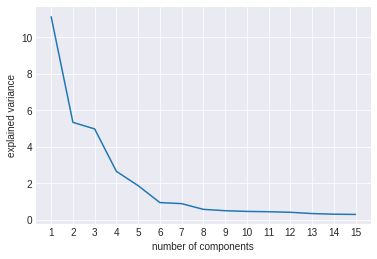

In [47]:
import numpy as np
EV = pca_model.explained_variance_[0:15]

plt.plot(EV)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.xticks(np.arange(len(EV)), np.arange(1, len(EV)+1))  #Otherwise the x-axis starts at 1)
plt.show()

In [48]:
np.cumsum(pca_model.explained_variance_ratio_)

array([0.32866183, 0.48640663, 0.63348375, 0.71190222, 0.76718415,
       0.79507175, 0.82125769, 0.83818692, 0.8529034 , 0.86651346,
       0.87959801, 0.89176626, 0.90190775, 0.91096601, 0.91969649,
       0.92777886, 0.93545474, 0.94211506, 0.94848823, 0.95451325,
       0.9603988 , 0.96517862, 0.96958947, 0.97375   , 0.97730079,
       0.98071328, 0.9836222 , 0.9863518 , 0.98878157, 0.99092157,
       0.99282812, 0.99458508, 0.9962077 , 0.99777414, 0.99869236,
       0.99935953, 0.99972191, 0.99994643, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

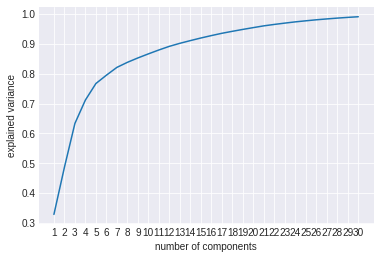

In [49]:
CS = np.cumsum(pca_model.explained_variance_ratio_)[0:30]
plt.plot(CS)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.xticks(np.arange(len(CS)), np.arange(1, len(CS)+1))

plt.show()

In [50]:
pca_model = PCA(n_components=7, svd_solver='full')
pca_model.fit(df)
pca_data= pca_model.transform(df)
pca_data.shape

(1277, 7)

### Train and test split
Shuffling the data

In [51]:
from random import Random
df_shuffle = df.sample(frac=1, random_state=6541)

In [52]:
from sklearn.model_selection import train_test_split

X = df_shuffle.drop(['profit_am'],1)
y = df_shuffle['profit_am']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6541)

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

max_features = ['auto']


criterion =['mse','mae']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 50)]
max_depth = [int(x) for x in np.linspace(1, 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(2, 15, num = 14)]
min_samples_leaf = [int(x) for x in np.linspace(1, 15, num = 15)]
max_leaf_nodes = [int(x) for x in np.linspace(10, 500, num = 50)]
loss = ['ls','lad','huber','quantile']
learning_rate = [round(x,5) for x in np.linspace(0.1, 1, num = 10)]

# create the random grid to search for best hyperparameters
random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes,
               'loss': loss,
               'learning_rate': learning_rate}

# then do cross-validatoin
gbm = GradientBoostingRegressor()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 150, 
                               cv = 3, verbose=1, random_state=1234, n_jobs=-1)
gbm_random.fit(X_train, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 73.8min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 75.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [54]:
print(gbm_random.score(X_train, y_train))
gbm_random.score(X_test, y_test)

0.9872849396390673


0.7292130242785599

In [55]:
gbm_random.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 11,
 'max_features': 'auto',
 'max_leaf_nodes': 120,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 475}

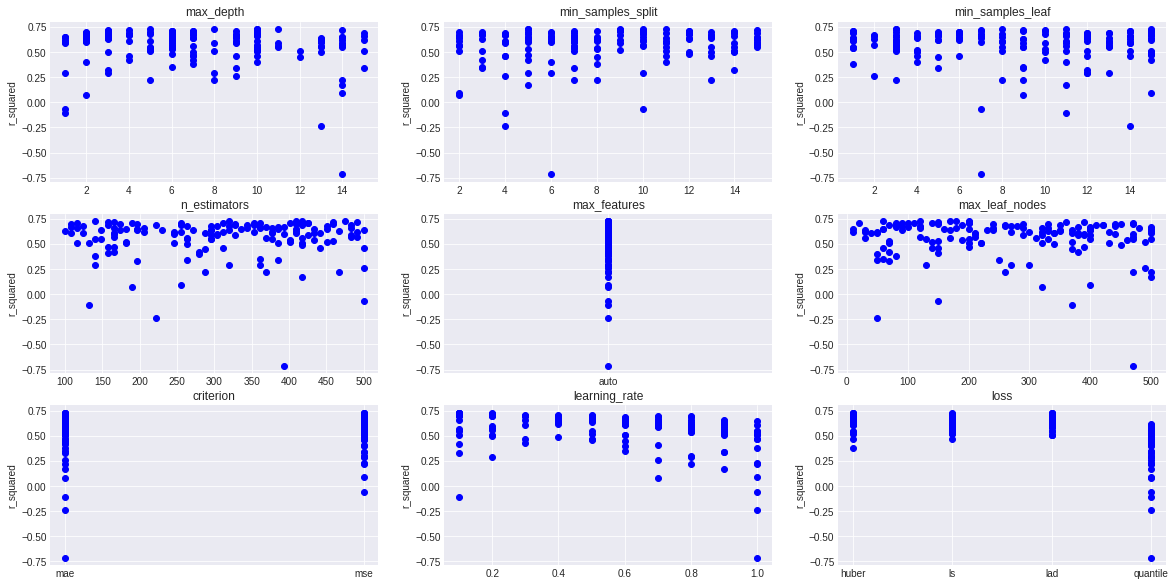

In [56]:
out2 = pd.DataFrame(gbm_random.cv_results_)

xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_max_features', 'param_max_leaf_nodes', 'param_criterion']

fig, axs = plt.subplots(3,3, figsize=(20,10))

axs[0,0].scatter(out2['param_max_depth'], out2['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out2['param_min_samples_split'], out2['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out2['param_min_samples_leaf'], out2['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out2['param_n_estimators'], out2['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')

axs[1,1].scatter(out2['param_max_features'], out2['mean_test_score'], c='blue');
axs[1,1].set_title('max_features')

axs[1,2].scatter(out2['param_max_leaf_nodes'], out2['mean_test_score'], c='blue');
axs[1,2].set_title('max_leaf_nodes')

axs[2,0].scatter(out2['param_criterion'], out2['mean_test_score'], c='blue');
axs[2,0].set_title('criterion')

axs[2,1].scatter(out2['param_learning_rate'], out2['mean_test_score'], c='blue');
axs[2,1].set_title('learning_rate')

axs[2,2].scatter(out2['param_loss'], out2['mean_test_score'], c='blue');
axs[2,2].set_title('loss')


for ax in axs.flat: ax.set(ylabel='r_squared')

In [59]:
out2 = out2[out2.mean_test_score > 0.5]

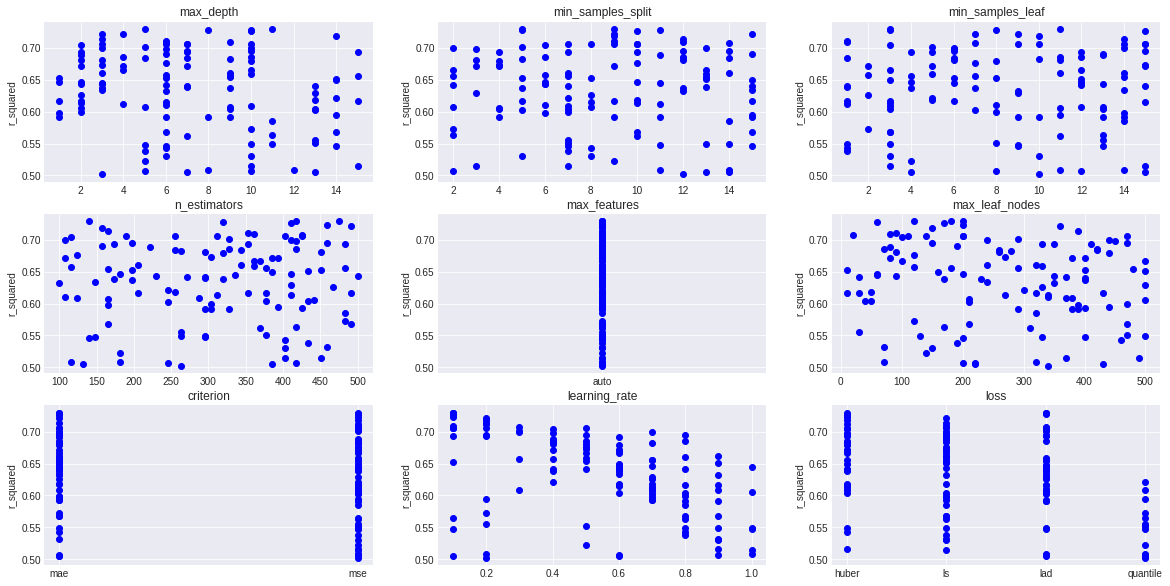

In [60]:
xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_max_features', 'param_max_leaf_nodes', 'param_criterion']

fig, axs = plt.subplots(3,3, figsize=(20,10))

axs[0,0].scatter(out2['param_max_depth'], out2['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out2['param_min_samples_split'], out2['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out2['param_min_samples_leaf'], out2['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out2['param_n_estimators'], out2['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')

axs[1,1].scatter(out2['param_max_features'], out2['mean_test_score'], c='blue');
axs[1,1].set_title('max_features')

axs[1,2].scatter(out2['param_max_leaf_nodes'], out2['mean_test_score'], c='blue');
axs[1,2].set_title('max_leaf_nodes')

axs[2,0].scatter(out2['param_criterion'], out2['mean_test_score'], c='blue');
axs[2,0].set_title('criterion')

axs[2,1].scatter(out2['param_learning_rate'], out2['mean_test_score'], c='blue');
axs[2,1].set_title('learning_rate')

axs[2,2].scatter(out2['param_loss'], out2['mean_test_score'], c='blue');
axs[2,2].set_title('loss')


for ax in axs.flat: ax.set(ylabel='r_squared')

In [61]:
gbm_random.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 11,
 'max_features': 'auto',
 'max_leaf_nodes': 120,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 475}

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

max_depth = [2, 3, 4]
min_samples_split = [5, 11, 13]
min_samples_leaf = [5, 8, 11]
n_estimators = [110, 349, 369, 469]
max_features = ['auto']
max_leaf_nodes = [80, 220, 420]
criterion =['mse']
learning_rate = [0.08, 0.09,0.1,0.11,0.12]
loss = ['huber']

# create the random grid to search for best hyperparameters
grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'max_leaf_nodes': max_leaf_nodes,
               'learning_rate': learning_rate,
               'loss':loss}

# then do cross-validatoin
gbm = GradientBoostingRegressor()
gbm_grid = GridSearchCV(estimator = gbm, param_grid = grid,
                               cv = 5, verbose=2,  n_jobs=-1)
# n_jobs=-1 to run as many models  parallel as possible
gbm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 59.9min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 71.2min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 89.6min
[Parallel(n_jobs=-1)]: Done 5828 tasks      | elapsed: 103.9min
[Parallel(n_jobs=-1)]: Done 6841 tasks      | elapsed: 123.6min
[Parallel(n_jobs=-1)]: Done 7934 tasks      | elapsed: 144.6min
[Parallel(n_jobs=-1)]: Done 8100 out of 810

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
             iid='deprecated

In [63]:
gbm_grid.best_params_

{'criterion': 'mse',
 'learning_rate': 0.09,
 'loss': 'huber',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': 80,
 'min_samples_leaf': 8,
 'min_samples_split': 11,
 'n_estimators': 110}

In [64]:
params = gbm_grid.best_params_
gbm_gridBest = GradientBoostingRegressor(**params)
gbm_gridBest.fit(X_train, y_train)
print('R2: %.3f' % gbm_gridBest.score(X_train, y_train))
print('R2: %.3f' % gbm_gridBest.score(X_test, y_test))

R2: 0.926
R2: 0.722
